Click Thru Ratae Prediction - Modeling
Capstone Project : Springboard Data Science career track
Notebook by Vidushi Raval



Introduction:

1. The Problem:

Online advertising platforms aim to show ads that users are likely to click on to maximize engagement and revenue. 

However, click-through rates (CTR) are typically low, leading to inefficient ad spending. 

The goal of this project is to build a predictive model that classifies whether a user will click on an ad, helping improve ad targeting, reduce wasted impressions, and optimize marketing performance.

2. The Data
   
The dataset used for this project comes from a Kaggle competition focused on click-through rate (CTR) prediction in online advertising. 

It contains millions of ad impressions and associated features related to users, ads, and devices. 

The goal is to predict whether a user will click on an ad (binary classification).

Below are some of the key fields in the dataset:

click – target variable; 1 if the ad was clicked, 0 otherwise

C1 – anonymized categorical variable related to user behavior

banner_pos – position of the ad banner on the page

site_id, site_domain, site_category – identifiers related to the site where the ad was displayed

app_id, app_domain, app_category – identifiers related to the app if ad was in-app

device_id, device_ip, device_model – information about the user’s device

device_type, device_conn_type – type of device and its connection

C14 to C21 – anonymized categorical features for ads and users

hour – timestamp of the ad impression in YYMMDDHH format (used to extract day, hour, weekday)

To improve modeling, several additional features were engineered, such as:

day – day of the month

hour_of_day – hour of the impression

weekday – day of the week

The dataset is highly imbalanced, with a low proportion of positive (clicked) labels, making it a real-world challenge for classification models.

3. The Questions of Interest
   
This analysis is organized around the following key questions to understand patterns in user behavior and improve click-through rate prediction:

- What proportion of users actually click on ads?

- Are there certain banner positions, site categories, or app domains that correlate with higher click rates?

- Do specific device types, models, or connection types influence user engagement with ads?

- Are certain hours of the day or days of the week associated with higher CTR?

- How do anonymized features like C14 to C21 contribute to click prediction?

- Does user behavior change between mobile apps and web platforms?

- Can we identify patterns in ad impressions that lead to better targeting strategies?

These questions help frame the modeling strategy and inform what features are most likely to improve prediction performance.



4. Import the necessary libraries and the data:
   
To begin, we import the essential libraries and load the dataset into a Pandas DataFrame.

The following steps include basic data wrangling and exploratory analysis. 

For a more in-depth EDA, please refer to the earlier section.
Data Wrangling - 
https://github.com/VidushiR/Springboard/blob/main/Capstone_two/data_wrangling.ipynb

Exploratory Analysis - 
https://github.com/VidushiR/Springboard/blob/main/Capstone_two/EDAforCTRPrediction.ipynb

CTR-Pre-processingAndTrainingDataDevelopment - 
https://github.com/VidushiR/Springboard/blob/main/Capstone_two/CTR-Pre-processingAndTrainingDataDevelopment.ipynb

In [36]:
# Import the necessary libraries and the data:


# 1. Import required libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

#ignore warning messages to ensure clean outputs
import warnings
warnings.filterwarnings('ignore')



In [38]:
import pandas as pd

# Set the path to your data folder
data_path = r"C:\Users\vidus\OneDrive\Documents\SpringBoard\CapestoneProjects\Final-ProjectCTRPrediction\data"

# Load the training and testing datasets
X_train = pd.read_csv(f"{data_path}\\X_train.csv")
X_test = pd.read_csv(f"{data_path}\\X_test.csv")
y_train = pd.read_csv(f"{data_path}\\y_train.csv")
y_test = pd.read_csv(f"{data_path}\\y_test.csv")

# Display shapes and preview of each dataset
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("\nPreview of X_train:\n", X_train.head())


X_train shape: (60046, 24)
X_test shape: (15012, 24)
y_train shape: (60046, 1)
y_test shape: (15012, 1)

Preview of X_train:
          C1  banner_pos   site_id  site_domain  site_category    app_id  \
0  0.022512   -0.491598 -0.198818    -1.136827      -0.829826  0.352128   
1  0.022512   -0.491598 -0.913772     0.852371      -0.829826  0.352128   
2  0.022512   -0.491598 -0.913772     0.852371      -0.829826  0.352128   
3  0.022512   -0.491598 -0.913772     0.852371      -0.829826  0.352128   
4  0.022512   -0.491598  0.463921     0.080094       0.696924  0.352128   

   app_domain  app_category  device_id  device_ip  ...       C15       C16  \
0    0.178354     -0.321387   0.187657   0.365528  ...  0.154979 -0.210344   
1    0.178354     -0.321387   0.187657  -0.964934  ...  0.154979 -0.210344   
2    0.178354     -0.321387   0.187657   1.412312  ...  0.154979 -0.210344   
3    0.178354     -0.321387   0.187657  -0.276494  ...  0.154979 -0.210344   
4    0.178354     -0.321387   0.1

In [40]:
# Load the CTR dataset
df = pd.read_csv(r"C:\Users\vidus\OneDrive\Documents\SpringBoard\CapestoneProjects\Final-ProjectCTRPrediction\data\clean_data\cleaned_ctr_prediction_data.csv")

# Display the first few rows
df.head()

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,C15,C16,C17,C18,C19,C20,C21,day,hour_of_day,weekday
0,0,1005,0,104,742,2,656,23,0,4865,...,320,50,1722,0,35,-1,79,21,0,1
1,0,1005,0,104,742,2,656,23,0,4865,...,320,50,1722,0,35,100084,79,21,0,1
2,0,1005,0,104,742,2,656,23,0,4865,...,320,50,1722,0,35,100084,79,21,0,1
3,0,1005,0,104,742,2,656,23,0,4865,...,320,50,1722,0,35,100084,79,21,0,1
4,0,1005,1,881,439,0,656,23,0,4865,...,320,50,2161,0,35,-1,157,21,0,1


In [44]:
# 3. Define models and hyperparameter grids
models = {
    "Logistic Regression": (LogisticRegression(solver='liblinear', random_state=42),
                            {'model__C': [0.01, 0.1, 1, 10]}),
    "Random Forest": (RandomForestClassifier(random_state=42),
                      {'model__n_estimators': [100, 200], 'model__max_depth': [5, 10, None]}),
    "Gradient Boosting": (GradientBoostingClassifier(random_state=42),
                          {'model__n_estimators': [100, 200], 'model__learning_rate': [0.05, 0.1], 'model__max_depth': [3, 6]})
}

In [46]:
# 4. Cross-validation setup and model evaluation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = []

for name, (model, param_grid) in models.items():
    pipe = Pipeline([
        ('scaler', MinMaxScaler(feature_range=(-1, 1))),
        ('model', model)
    ])
    grid = GridSearchCV(pipe, param_grid, cv=cv, scoring='f1', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    preds = best_model.predict(X_test)
    probs = best_model.predict_proba(X_test)[:, 1]

    results.append({
        "Model": name,
        "Best Parameters": grid.best_params_,
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds),
        "Recall": recall_score(y_test, preds),
        "F1 Score": f1_score(y_test, preds),
        "ROC AUC": roc_auc_score(y_test, probs)
    })

In [48]:
# 5. Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

                 Model                                    Best Parameters  \
0  Logistic Regression                                   {'model__C': 10}   
1        Random Forest  {'model__max_depth': None, 'model__n_estimator...   
2    Gradient Boosting  {'model__learning_rate': 0.1, 'model__max_dept...   

   Accuracy  Precision    Recall  F1 Score   ROC AUC  
0  0.783973   0.493506  0.011721  0.022898  0.623073  
1  0.723688   0.288515  0.190623  0.229569  0.604453  
2  0.785305   0.512102  0.123998  0.199652  0.685624  


In [50]:
# 6: Feature Scaling
scaler = MinMaxScaler(feature_range=(-1, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [52]:
# 7: Logistic Regression - Try different C values
C_param_range = [0.001, 0.01, 0.1, 1, 10, 100]
results = []

for c in C_param_range:
    model = LogisticRegression(C=c, penalty='l2', random_state=42, max_iter=1000)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((c, accuracy))


In [56]:
# 8: Create DataFrame of results
results_df = pd.DataFrame(results, columns=['C_parameter', 'Accuracy'])
print(results_df)


   C_parameter  Accuracy
0        0.001  0.784039
1        0.010  0.783973
2        0.100  0.784106
3        1.000  0.784039
4       10.000  0.783973
5      100.000  0.783973


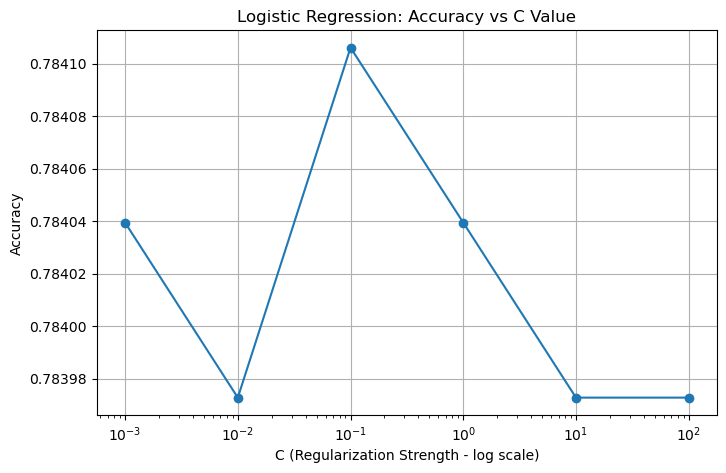

In [58]:
# 9: Plot the results
plt.figure(figsize=(8, 5))
plt.plot(results_df['C_parameter'], results_df['Accuracy'], marker='o')
plt.xscale('log')
plt.xlabel('C (Regularization Strength - log scale)')
plt.ylabel('Accuracy')
plt.title('Logistic Regression: Accuracy vs C Value')
plt.grid(True)
plt.show()

Now, let's do Random Forest Classifier for CTR Prediction


In [62]:
# Import libraries for Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [64]:
# Step 1: Define parameter grid for number of trees
n_estimators_range = [10, 50, 100, 200]
rf_results = []

In [66]:
# Step 2: Train and evaluate Random Forest models
for n in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train_scaled, y_train)
    y_pred_rf = rf.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred_rf)
    rf_results.append((n, acc))

In [68]:
# Step 3: Convert to DataFrame
rf_results_df = pd.DataFrame(rf_results, columns=['n_estimators', 'Accuracy'])
print(rf_results_df)


   n_estimators  Accuracy
0            10  0.727485
1            50  0.725087
2           100  0.723355
3           200  0.723688


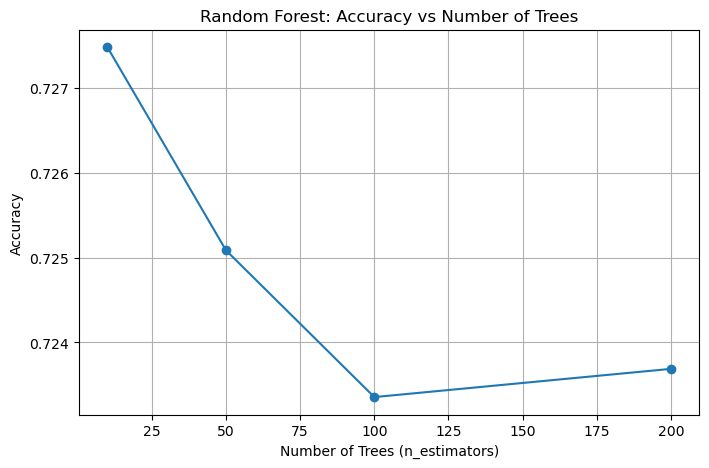

In [70]:
# Step 4: Plot accuracy vs n_estimators
plt.figure(figsize=(8, 5))
plt.plot(rf_results_df['n_estimators'], rf_results_df['Accuracy'], marker='o')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Random Forest: Accuracy vs Number of Trees')
plt.grid(True)
plt.show()

Now, let's do Gradient Boosting Classifier for CTR Prediction

In [73]:
# import libraries for Gradient Boosting Classifier for CTR Prediction

from sklearn.ensemble import GradientBoostingClassifier


In [88]:
# Step 1: Define parameter grid for learning rate
learning_rates = [0.01, 0.05, 0.1, 0.2]
gb_results = []

best_accuracy = 0
gb_model = None  # Placeholder for best model

In [91]:
# Step 2: Train and evaluate Gradient Boosting models
#for lr in learning_rates:
   # gb = GradientBoostingClassifier(learning_rate=lr, n_estimators=100, random_state=42)
  #  gb.fit(X_train_scaled, y_train)
  #  y_pred_gb = gb.predict(X_test_scaled)
  #  acc = accuracy_score(y_test, y_pred_gb)
  #  gb_results.append((lr, acc))


# Step 2: Train models with different learning rates
for lr in learning_rates:
    model = GradientBoostingClassifier(learning_rate=lr, random_state=42)
    model.fit(X_train, y_train.values.ravel())  # .values.ravel() if y is DataFrame
    acc = model.score(X_test, y_test)
    gb_results.append((lr, acc))

# Save the best model
    if acc > best_accuracy:
        best_accuracy = acc
        gb_model = model

In [79]:
# Step 3: Convert to DataFrame
gb_results_df = pd.DataFrame(gb_results, columns=['learning_rate', 'Accuracy'])
print(gb_results_df)

   learning_rate  Accuracy
0           0.01  0.784039
1           0.05  0.787370
2           0.10  0.787104
3           0.20  0.786904


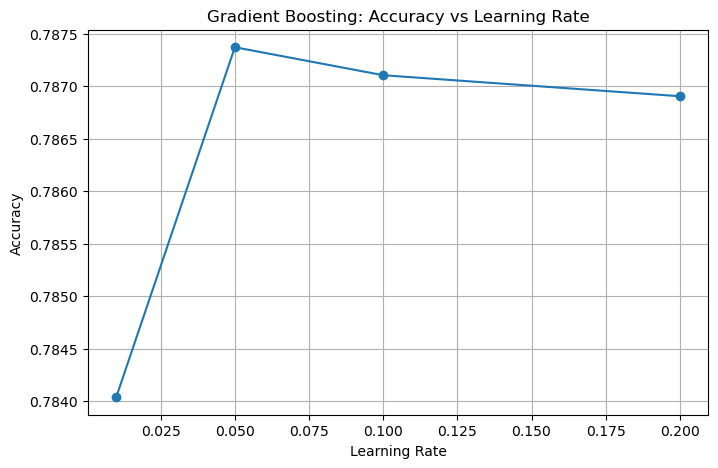

In [81]:
# Step 4: Plot accuracy vs learning rate
plt.figure(figsize=(8, 5))
plt.plot(gb_results_df['learning_rate'], gb_results_df['Accuracy'], marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Gradient Boosting: Accuracy vs Learning Rate')
plt.grid(True)
plt.show()

Now, let's Evaluate Best Model

In [84]:
# import libraries for to evaluate the best model

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score


In [93]:
# Assuming gb_model is your best Gradient Boosting model
# and it was trained using X_train and y_train

# Predict on test data
y_pred = gb_model.predict(X_test)


In [95]:
# If y_test is a DataFrame, convert it to a Series
if isinstance(y_test, pd.DataFrame):
    y_test = y_test.iloc[:, 0]


In [97]:
# Classification report
print("📄 Classification Report:")
print(classification_report(y_test, y_pred))


📄 Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.98      0.88     11770
           1       0.55      0.08      0.14      3242

    accuracy                           0.79     15012
   macro avg       0.67      0.53      0.51     15012
weighted avg       0.74      0.79      0.72     15012



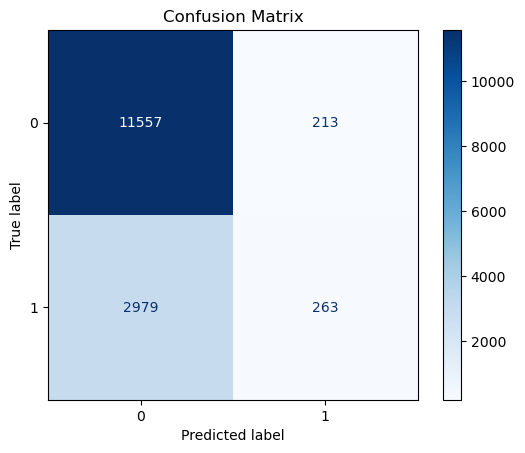

In [99]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [101]:
# ROC AUC Score (if your model supports predict_proba)
if hasattr(gb_model, "predict_proba"):
    y_proba = gb_model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f" ROC AUC Score: {roc_auc:.4f}")
else:
    print("ROC AUC not available - model does not support probability estimates.")

 ROC AUC Score: 0.6789


Based on the model evaluation - 
True Negatives (TN): 11,557

False Positives (FP): 213

False Negatives (FN): 2,979

True Positives (TP): 263

ROC AUC Score: 0.6789

In [106]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Initialize models
knn_model = KNeighborsClassifier()
svm_model = SVC()
nb_model = GaussianNB()

In [108]:
# Train models
knn_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)

GaussianNB()

In [114]:
import os
from sklearn.neighbors import KNeighborsClassifier

# Prevent multiprocessing issues
os.environ["JOBLIB_MULTIPROCESSING"] = "0"

# Redefine and fit the KNN model
knn_model = KNeighborsClassifier(n_jobs=1)
knn_model.fit(X_train, y_train)

# Predict
knn_preds = knn_model.predict(X_test)
svm_preds = svm_model.predict(X_test)  # assuming svm_model already fitted
nb_preds = nb_model.predict(X_test)    # assuming nb_model already fitted


In [116]:
# Evaluate
knn_report = classification_report(y_test, knn_preds, output_dict=True)
svm_report = classification_report(y_test, svm_preds, output_dict=True)
nb_report = classification_report(y_test, nb_preds, output_dict=True)

In [118]:
knn_cm = confusion_matrix(y_test, knn_preds)
svm_cm = confusion_matrix(y_test, svm_preds)
nb_cm = confusion_matrix(y_test, nb_preds)

(knn_report, knn_cm), (svm_report, svm_cm), (nb_report, nb_cm)

(({'0': {'precision': 0.8053124056746152,
    'recall': 0.9067119796091758,
    'f1-score': 0.853009351770442,
    'support': 11770.0},
   '1': {'precision': 0.37613636363636366,
    'recall': 0.2041949413942011,
    'f1-score': 0.2646941223510596,
    'support': 3242.0},
   'accuracy': 0.7549960031974421,
   'macro avg': {'precision': 0.5907243846554894,
    'recall': 0.5554534605016884,
    'f1-score': 0.5588517370607509,
    'support': 15012.0},
   'weighted avg': {'precision': 0.7126273052024589,
    'recall': 0.7549960031974421,
    'f1-score': 0.7259564624966852,
    'support': 15012.0}},
  array([[10672,  1098],
         [ 2580,   662]], dtype=int64)),
 ({'0': {'precision': 0.7968804159445407,
    'recall': 0.9766355140186916,
    'f1-score': 0.8776484061843863,
    'support': 11770.0},
   '1': {'precision': 0.5315161839863713,
    'recall': 0.09623689080814313,
    'f1-score': 0.16296683207103682,
    'support': 3242.0},
   'accuracy': 0.7865041300293099,
   'macro avg': {'prec

In [120]:
# Extract F1 scores for class 1 (click)
f1_scores = {
    'KNN': knn_report['1']['f1-score'],
    'SVM': svm_report['1']['f1-score'],
    'Naive Bayes': nb_report['1']['f1-score']
}


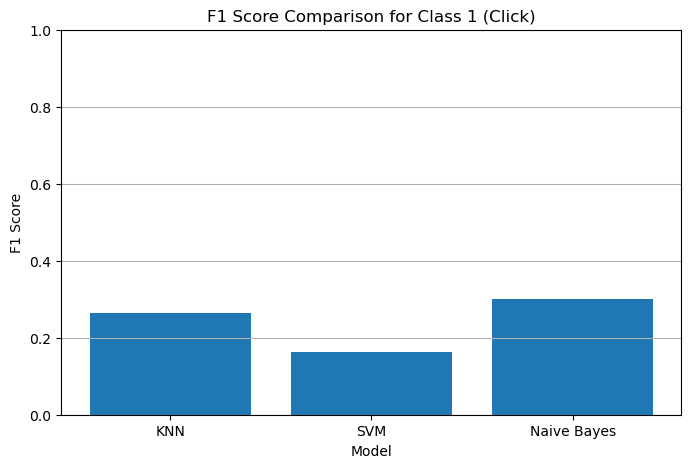

In [122]:
# Plot
plt.figure(figsize=(8, 5))
plt.bar(f1_scores.keys(), f1_scores.values())
plt.title('F1 Score Comparison for Class 1 (Click)')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

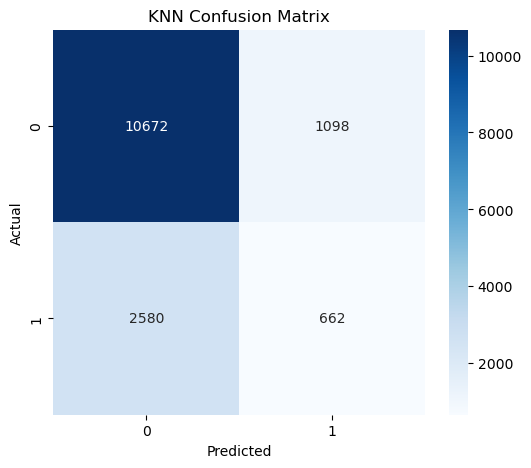

In [124]:
# Plot KNN
plt.figure(figsize=(6, 5))
sns.heatmap(knn_cm, annot=True, fmt="d", cmap="Blues")
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

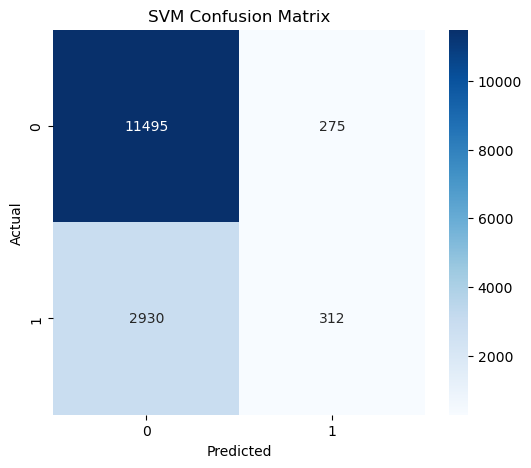

In [126]:
# Plot SVM
plt.figure(figsize=(6, 5))
sns.heatmap(svm_cm, annot=True, fmt="d", cmap="Blues")
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

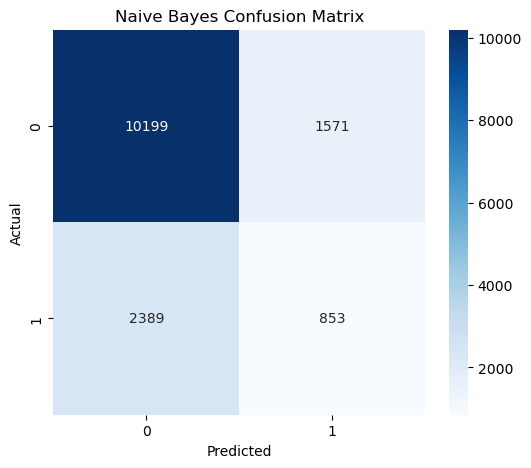

In [128]:
# Plot Naive Bayes
plt.figure(figsize=(6, 5))
sns.heatmap(nb_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [136]:
# Retry saving using a simplified approach
f1_summary = pd.DataFrame({
    'Model': ['KNN', 'SVM', 'Naive Bayes'],
    'F1 Score (Class 1 - Click)': [
        knn_report['1']['f1-score'],
        svm_report['1']['f1-score'],
        nb_report['1']['f1-score']
    ],
    'Precision (Class 1)': [
        knn_report['1']['precision'],
        svm_report['1']['precision'],
        nb_report['1']['precision']
    ],
    'Recall (Class 1)': [
        knn_report['1']['recall'],
        svm_report['1']['recall'],
        nb_report['1']['recall']
    ],
    'Accuracy': [
        knn_report['accuracy'],
        svm_report['accuracy'],
        nb_report['accuracy']
    ]
})

# Save summary only as CSV
csv_path = "/mnt/data/model_evaluation_summary.csv"
#f1_summary.to_csv(csv_path, index=False)
f1_summary.to_csv("C:/Users/vidus/Documents/model_evaluation_summary.csv", index=False)

csv_path


'/mnt/data/model_evaluation_summary.csv'

In [138]:
import pandas as pd

# Create the summary DataFrame
f1_summary = pd.DataFrame({
    'Model': ['KNN', 'SVM', 'Naive Bayes'],
    'F1 Score (Class 1 - Click)': [
        knn_report['1']['f1-score'],
        svm_report['1']['f1-score'],
        nb_report['1']['f1-score']
    ],
    'Precision (Class 1)': [
        knn_report['1']['precision'],
        svm_report['1']['precision'],
        nb_report['1']['precision']
    ],
    'Recall (Class 1)': [
        knn_report['1']['recall'],
        svm_report['1']['recall'],
        nb_report['1']['recall']
    ],
    'Accuracy': [
        knn_report['accuracy'],
        svm_report['accuracy'],
        nb_report['accuracy']
    ]
})

# Save to CSV
f1_summary.to_csv("model_evaluation_summary.csv", index=False)
print("File saved as model_evaluation_summary.csv")


File saved as model_evaluation_summary.csv


Does my data involve a time series or forecasting? If so, am I splitting the train
and test data appropriately?

- Click-Through Rate (CTR) prediction project, is a classification problem.
- The features are likely user behavior, ad properties, or device metadata, and the target is binary (click = 0 or 1).

If so, am I splitting the train and test data appropriately?
- Since this is not time series, using train_test_split() is appropriate. 

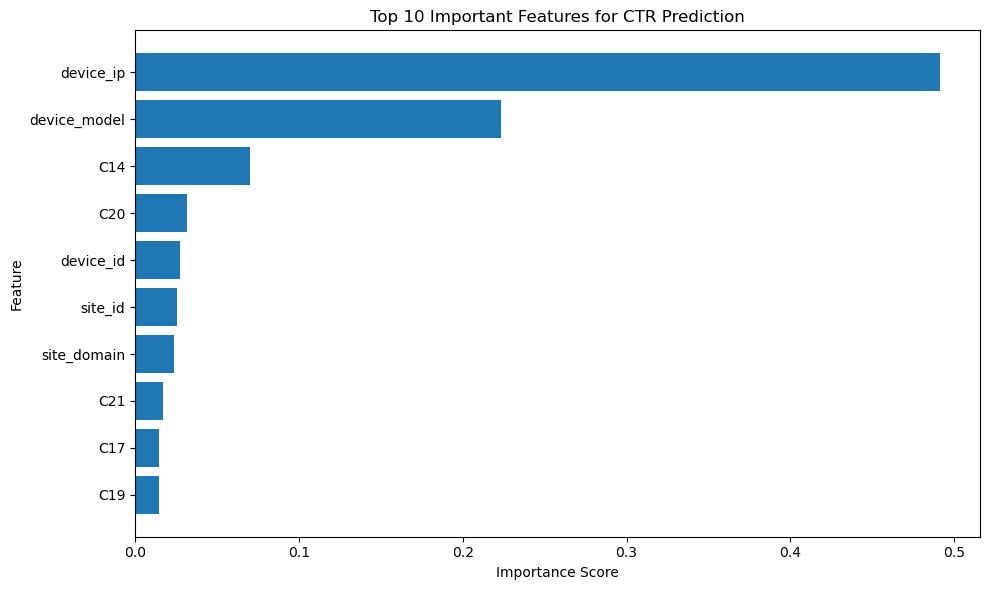

In [141]:
# identifying the most important features

from sklearn.ensemble import RandomForestClassifier
importances = None

# Fit a Random Forest model for feature importance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_
features = X_train.columns

# Create a DataFrame to show importance scores
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

import matplotlib.pyplot as plt

# Plot top 10 features
top_n = 10
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'].head(top_n)[::-1],
         feature_importance_df['Importance'].head(top_n)[::-1])
plt.title("Top 10 Important Features for CTR Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


Influential Features in CTR Prediction are:

1. device_ip — Highest importance (likely acting as a proxy for user identity or network).

2. device_model — May capture differences in user behavior based on device capability.

3. C14 — Possibly an ad category or campaign-related feature.

Is my response variable continuous or categorical?

- Because we are predicting Click-Through Rate (CTR) as either:

0 → No Click

1 → Click

This makes it a binary classification problem, not regression.




Type: Categorical

Levels: Binary (0 or 1)

Modeling approach: Classification (e.g., Logistic Regression, Random Forest, SVM, KNN, etc.)

Conclusion:

This project focused on predicting whether users will click on online advertisements using classification models. The response variable is categorical (binary: click or no-click), making this a supervised classification problem.